# Zig Zag Indicator
- Test code to show functionality of the zig-zag indicator

In [29]:
%load_ext autoreload
%autoreload

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import MetaTrader5 as mt5

from zig_zag import zig_zag, highest, lowest
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
# connect to MetaTrader 5
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()

symbol = "EURUSD"
eurgbp_rates = mt5.copy_rates_from_pos(symbol, mt5.TIMEFRAME_M15, 0, 1200)

# shut down connection to MetaTrader 5
mt5.shutdown()

df = pd.DataFrame(eurgbp_rates)

df["Date"] = pd.to_datetime(df["time"], unit="s")

df.set_index("Date", inplace=True)

df.columns = ["Time", "Open", "High", "Low", "Close", "Volume", "Spread",
       "Real Volume"]

zig_zag = zig_zag(df["High"].to_numpy(), df["Low"].to_numpy(), point=0.0001, depth=12, deviation=5, back_step=3)

#low_idx = lowest(df["Close"], 12, 1)

1200


IndexError: index 1200 is out of bounds for axis 0 with size 1200

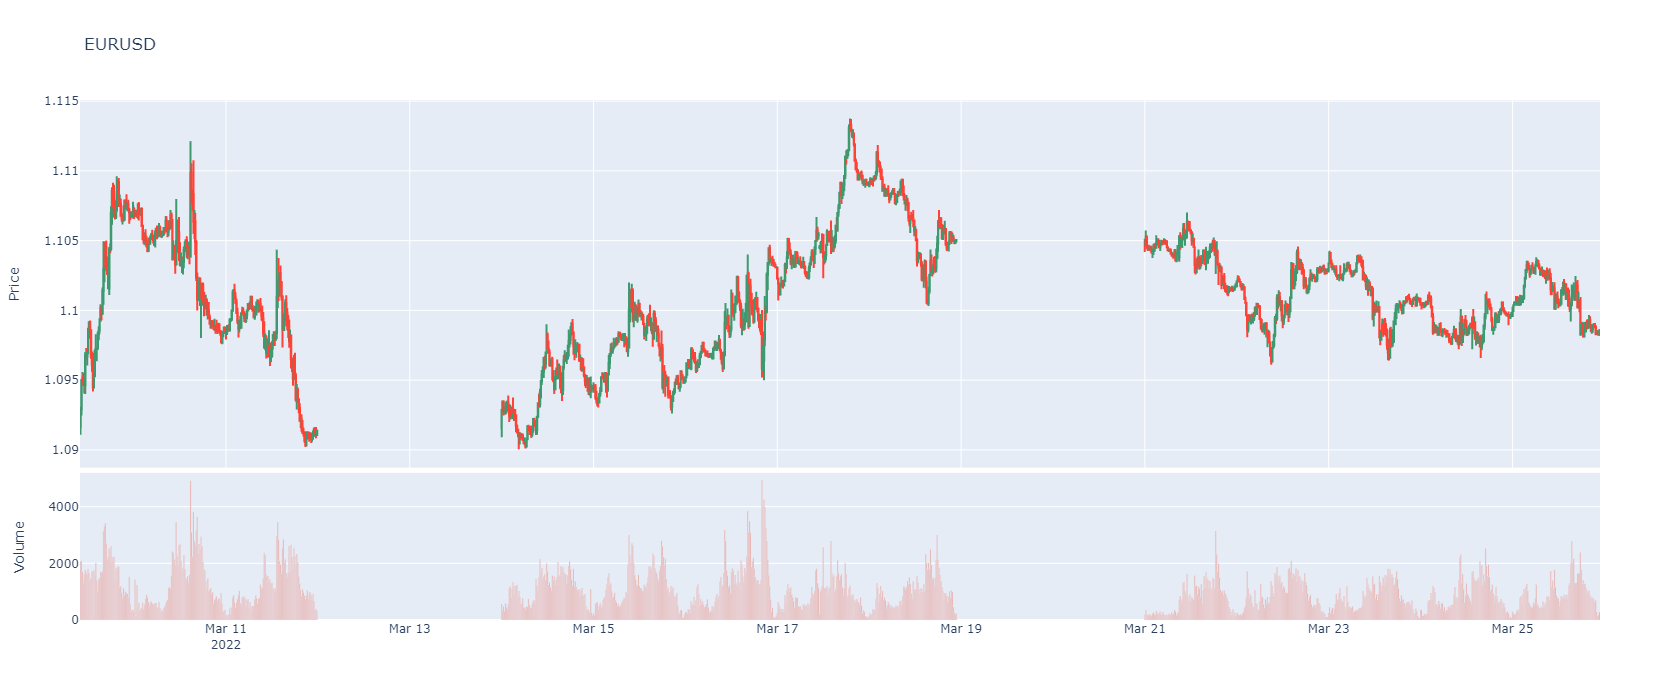

In [18]:
df_plot = df.copy()
fig = make_subplots(rows=2, cols=1, 
                    vertical_spacing=0.01,
                    row_heights=[0.5, 0.2],
                    shared_xaxes=True)

fig.add_trace(go.Candlestick(
    x=df_plot.index,
    open=df_plot["Open"],
    high=df_plot["High"],
    low=df_plot["Low"],
    close=df_plot["Close"]),
    row=1, col=1
)

fig.update_yaxes(title_text="Price", row=1, col=1)
fig.update_yaxes(title_text="Volume", row=2, col=1)

fig.update_layout(title=symbol,
                  height=700, width=1200,
                  showlegend=False, 
                  xaxis_rangeslider_visible=False)

fig.add_trace(go.Bar(
    x=df_plot.index, 
    y=df_plot["Volume"]), 
    row=2, col=1
)

fig.show()